In [105]:
###### Machine Learning Libraries ######

import numpy as np
import pandas as pd
import scipy as shc
import nltk
import spacy
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, silhouette_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, chi2, mutual_info_classif, mutual_info_regression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, VotingClassifier, VotingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from xgboost import XGBClassifier, XGBRegressor

###### Deep Learning Libraries ######

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU, Conv2D, MaxPool2D, AveragePooling2D, Flatten, LSTM, Bidirectional, Embedding
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.activations import relu, sigmoid, softmax, swish
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy, Huber, Hinge, MSE, MAE
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Nadam, Adamax
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

###### NLP Libraries ######

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

###### Download functions for nltk ######

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [253]:
###### Read the file and separate the Independent & Dependent ######
indpendent_ = []
dependent_  = []
file_ = open("/content/emotion.txt", "r")
for sentence_ in file_:
  split_ = sentence_.split(";")
  indpendent_.append([split_[0]])
  dependent_.append(split_[1])

print("Separation is completed.")

Separation is completed.


In [254]:
##### Create the DataFrame of Independent & Dependent #####
indpendent_  = pd.DataFrame(indpendent_, columns = ['message'])
dependent_   = pd.DataFrame(dependent_, columns  = ['target'])

print("DataFrame is created.")

DataFrame is created.


In [255]:
##### Concat the Independent & Dependent Column #####
df = pd.concat([indpendent_, dependent_], axis = 1)
df.head()

,message,target
0,i didnt feel humiliated,sadness\n
1,i can go from feeling so hopeless to so damned...,sadness\n
2,im grabbing a minute to post i feel greedy wrong,anger\n
3,i am ever feeling nostalgic about the fireplac...,love\n
4,i am feeling grouchy,anger\n


In [241]:
###### Remove the Extra \n from the target column ######
df.loc[:, 'target'] = df.loc[:, 'target'].str.replace('\n','')
df.head()

,message,target
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


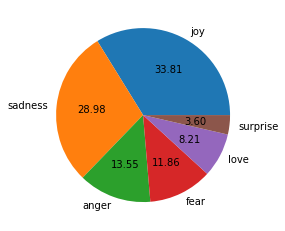

In [6]:
###### Show the value counts of the target column ######
plt.pie(df.loc[:, 'target'].value_counts(), labels = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise'], autopct = "%0.2f")
plt.show()

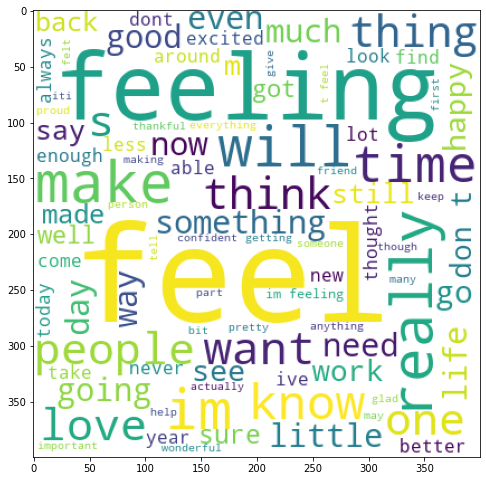

In [7]:
###### Check the most frequent words in the Joy ######
plt.figure(figsize = (8, 12))
wordcloud_ = WordCloud(height = 400, width = 400, min_font_size = 8, background_color = 'white')
wordcloud_.generate(df.loc[df.loc[:, 'target'] == 'joy', 'message'].str.cat(sep = ''))

plt.imshow(wordcloud_)

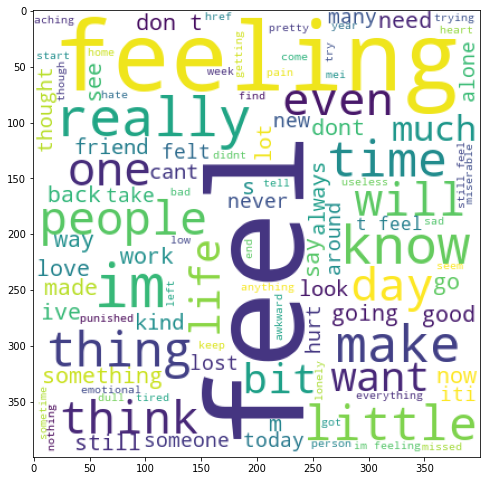

In [8]:
###### Check the most frequent words in the Joy ######
plt.figure(figsize = (8, 12))
wordcloud_ = WordCloud(height = 400, width = 400, min_font_size = 8, background_color = 'white')
wordcloud_.generate(df.loc[df.loc[:, 'target'] == 'sadness', 'message'].str.cat(sep = ''))

plt.imshow(wordcloud_)

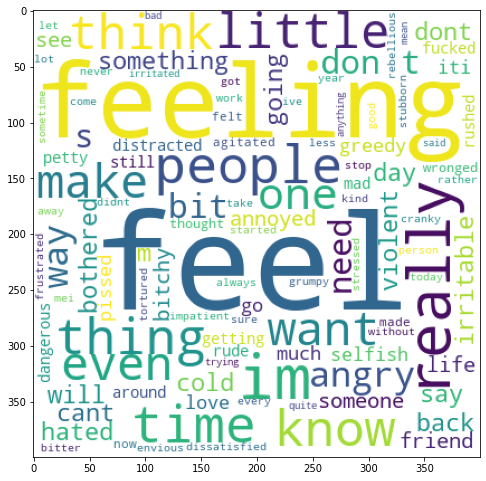

In [9]:
###### Check the most frequent words in the Joy ######
plt.figure(figsize = (8, 12))
wordcloud_ = WordCloud(height = 400, width = 400, min_font_size = 8, background_color = 'white')
wordcloud_.generate(df.loc[df.loc[:, 'target'] == 'anger', 'message'].str.cat(sep = ''))

plt.imshow(wordcloud_)

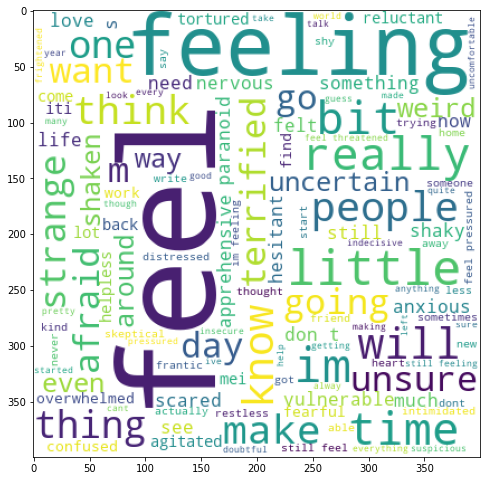

In [10]:
###### Check the most frequent words in the Joy ######
plt.figure(figsize = (8, 12))
wordcloud_ = WordCloud(height = 400, width = 400, min_font_size = 8, background_color = 'white')
wordcloud_.generate(df.loc[df.loc[:, 'target'] == 'fear', 'message'].str.cat(sep = ''))

plt.imshow(wordcloud_)

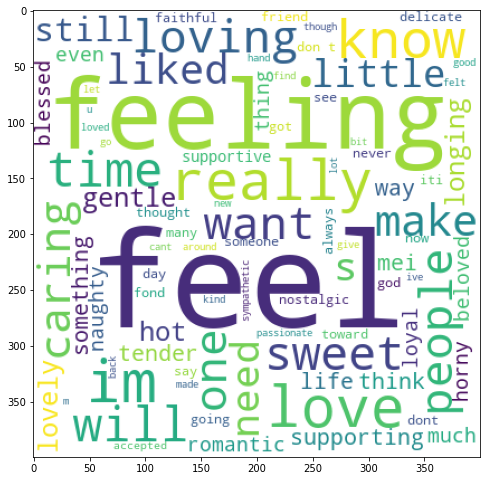

In [11]:
###### Check the most frequent words in the Joy ######
plt.figure(figsize = (8, 12))
wordcloud_ = WordCloud(height = 400, width = 400, min_font_size = 8, background_color = 'white')
wordcloud_.generate(df.loc[df.loc[:, 'target'] == 'love', 'message'].str.cat(sep = ''))

plt.imshow(wordcloud_)

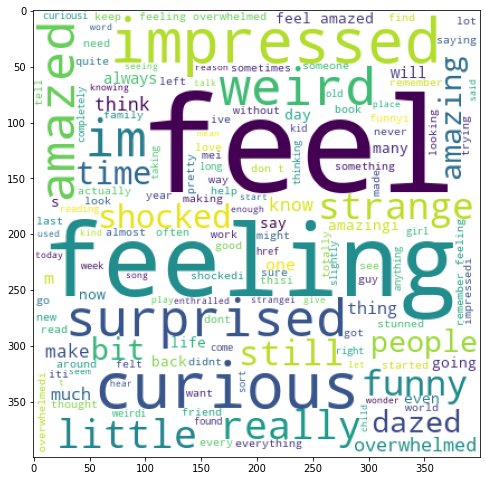

In [12]:
###### Check the most frequent words in the Joy ######
plt.figure(figsize = (8, 12))
wordcloud_ = WordCloud(height = 400, width = 400, min_font_size = 8, background_color = 'white')
wordcloud_.generate(df.loc[df.loc[:, 'target'] == 'surprise', 'message'].str.cat(sep = ''))

plt.imshow(wordcloud_)

In [13]:
df.describe()

,message,target
count,20000,20000
unique,19948,6
top,i feel a remembrance of the strange by justin ...,joy
freq,2,6761


In [14]:
###### Check null value present or not in the dataset ######
if df.isnull().sum().sum() == 0:
  print("NO NaN value in the dataset.")
else:
  print("NaN value in the dataset.")

NO NaN value in the dataset.


In [256]:
###### Check duplicate record in the dataset or not ######
print("# of duplicated records in this dataset is = ", df.duplicated().sum())

# of duplicated records in this dataset is =  1


In [257]:
###### Drop the duplicated record in the dataset ######
df.drop_duplicates(inplace = True)
print("Duplicated records have been deleted.")

Duplicated records have been deleted.


In [258]:
###### print the number of row and column ######
print("# of rows in this dataset is = ", df.shape[0], '\n')
print("# of columns in this dataset = ", df.shape[1])

# of rows in this dataset is =  19999 

# of columns in this dataset =  2


In [18]:
###### Number of character is used in joy dataset ######
df['num_char'] = df.loc[:, 'message'].apply(lambda x:len(x))

###### Number of words is used in joy dataset ######
df['num_word'] = df.loc[:, 'message'].apply(lambda x: len(word_tokenize(x)))

###### Number of sentences is used in joy dataset ######
df['num_sen'] = df.loc[:, 'message'].apply(lambda x: len(sent_tokenize(x)))

df.head()

,message,target,num_char,num_word,num_sen
0,i didnt feel humiliated,sadness,23,4,1
1,i can go from feeling so hopeless to so damned...,sadness,108,21,1
2,im grabbing a minute to post i feel greedy wrong,anger,48,10,1
3,i am ever feeling nostalgic about the fireplac...,love,92,18,1
4,i am feeling grouchy,anger,20,4,1


In [19]:
df.loc[df.loc[:, 'target'] == 'joy', :].describe()

,num_char,num_word,num_sen
count,6760.000000,6760.000000,6760.0
mean,98.114349,19.436243,1.0
std,55.173050,10.830361,0.0
min,9.000000,2.000000,1.0
25%,55.750000,11.000000,1.0
50%,88.000000,18.000000,1.0
75%,130.000000,26.000000,1.0
max,300.000000,64.000000,1.0


In [21]:
###### Check how many char, word, sent used in joy ######
df.loc[df.loc[:, 'target'] == 'joy', :].describe()

,num_char,num_word,num_sen
count,6760.000000,6760.000000,6760.0
mean,98.114349,19.436243,1.0
std,55.173050,10.830361,0.0
min,9.000000,2.000000,1.0
25%,55.750000,11.000000,1.0
50%,88.000000,18.000000,1.0
75%,130.000000,26.000000,1.0
max,300.000000,64.000000,1.0


In [22]:
df.target.value_counts()

joy         6760
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: target, dtype: int64

In [23]:
###### Check how many char, word, sent used in sadness ######
df.loc[df.loc[:, 'target'] == 'sadness', :].describe()

,num_char,num_word,num_sen
count,5797.000000,5797.000000,5797.0
mean,92.776264,18.421252,1.0
std,55.957780,11.028958,0.0
min,7.000000,2.000000,1.0
25%,49.000000,10.000000,1.0
50%,80.000000,16.000000,1.0
75%,123.000000,25.000000,1.0
max,299.000000,66.000000,1.0


In [24]:
###### Check how many char, word, sent used in anger ######
df.loc[df.loc[:, 'target'] == 'anger', :].describe()

,num_char,num_word,num_sen
count,2709.000000,2709.000000,2709.0
mean,97.047988,19.260613,1.0
std,57.041647,11.292702,0.0
min,9.000000,2.000000,1.0
25%,52.000000,10.000000,1.0
50%,86.000000,17.000000,1.0
75%,131.000000,26.000000,1.0
max,298.000000,62.000000,1.0


In [25]:
###### Check how many char, word, sent used in fear ######
df.loc[df.loc[:, 'target'] == 'fear', :].describe()

,num_char,num_word,num_sen
count,2373.000000,2373.000000,2373.0
mean,95.666667,18.751791,1.0
std,55.206783,10.908998,0.0
min,9.000000,2.000000,1.0
25%,53.000000,10.000000,1.0
50%,85.000000,16.000000,1.0
75%,126.000000,25.000000,1.0
max,296.000000,60.000000,1.0


In [26]:
###### Check how many char, word, sent used in love ######
df.loc[df.loc[:, 'target'] == 'love', :].describe()

,num_char,num_word,num_sen
count,1641.000000,1641.000000,1641.0
mean,103.778793,20.617307,1.0
std,54.915038,10.740102,0.0
min,13.000000,3.000000,1.0
25%,61.000000,12.000000,1.0
50%,94.000000,19.000000,1.0
75%,137.000000,27.000000,1.0
max,299.000000,63.000000,1.0


In [27]:
###### Check how many char, word, sent used in surprise ######
df.loc[df.loc[:, 'target'] == 'surprise', :].describe()

,num_char,num_word,num_sen
count,719.000000,719.000000,719.0
mean,100.196106,19.727399,1.0
std,56.754067,11.039217,0.0
min,12.000000,3.000000,1.0
25%,57.500000,11.000000,1.0
50%,86.000000,17.000000,1.0
75%,132.000000,26.000000,1.0
max,287.000000,61.000000,1.0


In [29]:
df = df.loc[:, ['message', 'target']]
df.head()

,message,target
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [30]:
df.target.value_counts()

joy         6760
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: target, dtype: int64

In [259]:
###### Label Encoding in this dataset ######
# df.loc[:, 'target'] = df.loc[:, 'target'].map({'joy': 0, 'sadness': 1, 'anger': 2, 'fear': 3, 'love': 4, 'surprise': 5})
lb = LabelEncoder()
df['target'] = lb.fit_transform(df['target'])

df.head()

,message,target
0,i didnt feel humiliated,5
1,i can go from feeling so hopeless to so damned...,5
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,4
4,i am feeling grouchy,0


In [260]:
###### Lowering the dataset #######
df.loc[:, 'message'] = df.loc[:, 'message'].apply(lambda x:x.lower())

df.head()

,message,target
0,i didnt feel humiliated,5
1,i can go from feeling so hopeless to so damned...,5
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,4
4,i am feeling grouchy,0


In [261]:
###### Remove the stopwords in the dataset ######
def remove_stopwords(eachRecord_):
  cleaned_text_ = []

  for word_ in word_tokenize(eachRecord_):
    if word_ in stopwords.words('english'):
      pass
    else:
      cleaned_text_.append(word_)

  return ' '.join(cleaned_text_)

df.loc[:, 'message'] = df.loc[:, 'message'].apply(remove_stopwords)

df.head()

,message,target
0,didnt feel humiliated,5
1,go feeling hopeless damned hopeful around some...,5
2,im grabbing minute post feel greedy wrong,0
3,ever feeling nostalgic fireplace know still pr...,4
4,feeling grouchy,0


In [262]:
from operator import pos
###### Use WordNet Lemmitizer #######
wordnetlemmatizer_ = WordNetLemmatizer()
def WordNetLemmatizer_(eachRecord_):
  cleaned_text_ = []

  for word_ in word_tokenize(eachRecord_):
    cleaned_text_.append(wordnetlemmatizer_.lemmatize(word_, pos ='v'))

  return " ".join(cleaned_text_)

df.loc[:, 'message'] = df.loc[:, 'message'].apply(WordNetLemmatizer_)

df.head()

,message,target
0,didnt feel humiliate,5
1,go feel hopeless damn hopeful around someone c...,5
2,im grab minute post feel greedy wrong,0
3,ever feel nostalgic fireplace know still property,4
4,feel grouchy,0


Bag Of Word Used in this Dataset to Convrt Word into Vectors

In [39]:
###### Split the dataset into X and y ######
X = df.loc[:, 'message']
y = df.loc[:, 'target']

BOW_ = CountVectorizer()
X = BOW_.fit_transform(X).toarray()

###### Train and test split the dataset ######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print("X_train shape is = ", X_train.shape)
print("y_train shape is = ", y_train.shape)
print("X_test  shape is = ", X_test.shape)
print("y_test  shape is = ", y_test.shape)

X_train shape is =  (15999, 12755)
y_train shape is =  (15999,)
X_test  shape is =  (4000, 12755)
y_test  shape is =  (4000,)


In [43]:
###### GaussianNB, BernoulliNB, MultinomialNB ######

GaussianNB_ = GaussianNB()
GaussianNB_.fit(X_train, y_train)
predicted_ = GaussianNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'micro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'micro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'micro'))

accuracy score is =  0.316
recall score is   =  0.316
f1 score of its   =  0.316
precision score is=  0.316


In [44]:
confusion_matrix(predicted_, y_test)

array([[419,  76,  54,  34,  65,  22],
       [180, 308,  66,  68,  32,  27],
       [112, 217, 161,  32,  16,  12],
       [167, 228, 106, 182,  35,  18],
       [292, 192,  83,  75, 138,  18],
       [167, 172,  66,  65,  39,  56]])

In [46]:
###### GaussianNB, BernoulliNB, MultinomialNB

BernoulliNB_ = BernoulliNB()
BernoulliNB_.fit(X_train, y_train)
predicted_ = BernoulliNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.697
recall score is   =  0.7554966198463872
f1 score of its   =  0.46765499871806204
precision score is=  0.4580668097162819


In [47]:
###### GaussianNB, BernoulliNB, MultinomialNB

MultinomialNB_ = MultinomialNB()
MultinomialNB_.fit(X_train, y_train)
predicted_ = MultinomialNB_.predict(X_test)


print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.784
recall score is   =  0.7910191540428219
f1 score of its   =  0.6289751937298617
precision score is=  0.5992324123270113


In [48]:
confusion_matrix(predicted_, y_test)

array([[1258,   58,   61,   54,  150,   65],
       [  49, 1097,   90,   97,   50,   53],
       [  10,   22,  365,   16,    3,    2],
       [   3,   11,   19,  287,    1,   24],
       [  15,    3,    1,    2,  121,    1],
       [   2,    2,    0,    0,    0,    8]])

In [49]:
##### SGD Classifier ######

SGDClassifier_ = SGDClassifier()
SGDClassifier_.fit(X_train, y_train)
predicted_ = SGDClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.87175
recall score is   =  0.8357981536039126
f1 score of its   =  0.826329702136534
precision score is=  0.8211073156717883


In [50]:
###### MLP Classifier #######

MLPClassifier_ = MLPClassifier()
MLPClassifier_.fit(X_train, y_train)
predicted_ = MLPClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.833
recall score is   =  0.7832151639653783
f1 score of its   =  0.7799045780459558
precision score is=  0.7770901003117565


In [51]:
###### RandomForest Classifier ######
RandomForestClassifier_ = RandomForestClassifier()
RandomForestClassifier_.fit(X_train, y_train)
predicted_ = RandomForestClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.874
recall score is   =  0.8276255825217805
f1 score of its   =  0.8356304229019954
precision score is=  0.8477020917292477


In [52]:
confusion_matrix(predicted_, y_test)

array([[1191,   29,   16,    6,   62,    3],
       [  36, 1084,   21,   27,   10,    4],
       [  20,   39,  483,   25,    4,    0],
       [  22,   24,   11,  367,    3,   19],
       [  51,    5,    0,    1,  244,    0],
       [  17,   12,    5,   30,    2,  127]])

In [54]:
###### Xgboost Classifier ######
XGBClassifier_ = XGBClassifier()
XGBClassifier_.fit(X_train, y_train)
predicted_ = XGBClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.75725
recall score is   =  0.8280560422659692
f1 score of its   =  0.7300501804421553
precision score is=  0.6893373071028343


In [53]:
confusion_matrix(predicted_, y_test)

array([[1191,   29,   16,    6,   62,    3],
       [  36, 1084,   21,   27,   10,    4],
       [  20,   39,  483,   25,    4,    0],
       [  22,   24,   11,  367,    3,   19],
       [  51,    5,    0,    1,  244,    0],
       [  17,   12,    5,   30,    2,  127]])

TF-IDF Technique is used to Convert the words into Vectors

In [72]:
###### Split the dataset into X and y ######
X = df.loc[:, 'message']
y = df.loc[:, 'target']

TFIDF_ = TfidfVectorizer(max_features = 2500, binary = True)
X = TFIDF_.fit_transform(X).toarray()

###### Train and test split the dataset ######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print("X_train shape is = ", X_train.shape)
print("y_train shape is = ", y_train.shape)
print("X_test  shape is = ", X_test.shape)
print("y_test  shape is = ", y_test.shape)

X_train shape is =  (15999, 2500)
y_train shape is =  (15999,)
X_test  shape is =  (4000, 2500)
y_test  shape is =  (4000,)


In [56]:
###### GaussianNB, BernoulliNB, MultinomialNB ######

GaussianNB_ = GaussianNB()
GaussianNB_.fit(X_train, y_train)
predicted_ = GaussianNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'micro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'micro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'micro'))

accuracy score is =  0.3714
recall score is   =  0.3714
f1 score of its   =  0.3714
precision score is=  0.3714


In [57]:
confusion_matrix(predicted_, y_test)

array([[552,  53,  37,  32,  66,  20],
       [ 68, 409,  57,  41,  20,  25],
       [179, 276, 302,  43,  18,   7],
       [234, 293,  81, 300,  42,  25],
       [394, 233, 107,  61, 202,  20],
       [229, 221, 107,  87,  67,  92]])

In [58]:
###### GaussianNB, BernoulliNB, MultinomialNB

BernoulliNB_ = BernoulliNB()
BernoulliNB_.fit(X_train, y_train)
predicted_ = BernoulliNB_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.8114
recall score is   =  0.7413211342249385
f1 score of its   =  0.7126182010584686
precision score is=  0.6944356266579191


In [59]:
confusion_matrix(predicted_, y_test)

array([[1493,   46,   35,   22,  142,   52],
       [  51, 1315,   70,   59,   44,   44],
       [  18,   37,  534,   23,    9,    1],
       [  21,   32,   31,  445,    4,   32],
       [  59,   25,    9,    8,  212,    2],
       [  14,   30,   12,    7,    4,   58]])

In [60]:
###### GaussianNB, BernoulliNB, MultinomialNB

MultinomialNB_ = MultinomialNB()
MultinomialNB_.fit(X_train, y_train)
predicted_ = MultinomialNB_.predict(X_test)


print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.775
recall score is   =  0.8600768534869198
f1 score of its   =  0.6067959907786181
precision score is=  0.5723798579777902


In [61]:
confusion_matrix(predicted_, y_test)

array([[1601,   79,  121,   94,  230,  104],
       [  48, 1395,  132,  120,   64,   52],
       [   3,    3,  421,   16,    2,    0],
       [   2,    7,   17,  331,    1,   24],
       [   2,    1,    0,    2,  118,    0],
       [   0,    0,    0,    1,    0,    9]])

In [62]:
##### SGD Classifier ######

SGDClassifier_ = SGDClassifier()
SGDClassifier_.fit(X_train, y_train)
predicted_ = SGDClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.8776
recall score is   =  0.8433872241794599
f1 score of its   =  0.8339144840927545
precision score is=  0.8291783244550662


In [63]:
confusion_matrix(predicted_, y_test)

array([[1521,   30,   24,   19,   96,    8],
       [  40, 1399,   39,   48,   30,   11],
       [  14,   26,  605,   24,    8,    0],
       [   9,   17,   18,  433,    1,   19],
       [  54,    6,    2,    3,  279,    0],
       [  18,    7,    3,   37,    1,  151]])

In [64]:
###### MLP Classifier #######

MLPClassifier_ = MLPClassifier()
MLPClassifier_.fit(X_train, y_train)
predicted_ = MLPClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.838
recall score is   =  0.7990903444974631
f1 score of its   =  0.790927264438686
precision score is=  0.7834183487744819


In [65]:
confusion_matrix(predicted_, y_test)

array([[1460,   52,   37,   24,   87,   25],
       [  65, 1325,   53,   49,   25,   14],
       [  19,   55,  561,   20,   11,    0],
       [  20,   31,   27,  434,    5,   25],
       [  83,   17,    5,    8,  286,    1],
       [   9,    5,    8,   29,    1,  124]])

In [66]:
###### RandomForest Classifier ######
RandomForestClassifier_ = RandomForestClassifier()
RandomForestClassifier_.fit(X_train, y_train)
predicted_ = RandomForestClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.8562
recall score is   =  0.8161063934581455
f1 score of its   =  0.8147993470619065
precision score is=  0.8157034384088385


In [67]:
confusion_matrix(predicted_, y_test)

array([[1445,   42,   25,    4,  103,   16],
       [  69, 1325,   36,   22,    8,    5],
       [  27,   53,  592,   24,    6,    1],
       [  30,   45,   31,  497,    4,   37],
       [  62,    8,    4,    1,  292,    0],
       [  23,   12,    3,   16,    2,  130]])

In [68]:
###### Xgboost Classifier ######
XGBClassifier_ = XGBClassifier()
XGBClassifier_.fit(X_train, y_train)
predicted_ = XGBClassifier_.predict(X_test)

print("accuracy score is = ", accuracy_score(predicted_, y_test))
print("recall score is   = ", recall_score(predicted_, y_test, average = 'macro'))
print("f1 score of its   = ", f1_score(predicted_, y_test, average = 'macro'))
print("precision score is= ", precision_score(predicted_, y_test, average = 'macro'))

accuracy score is =  0.7538
recall score is   =  0.8286062590768178
f1 score of its   =  0.7251275250240391
precision score is=  0.6839821615745024


In [69]:
confusion_matrix(predicted_, y_test)

array([[1590,  328,  262,  189,  199,   42],
       [  15, 1111,   23,   15,    6,    0],
       [   5,   17,  393,    5,    2,    0],
       [   4,   11,    8,  328,    2,    5],
       [  19,    4,    2,    4,  205,    0],
       [  23,   14,    3,   23,    1,  142]])

Shallow Deep Learning - ANN is used in this dataset. Technique used TFIDF for converting Words into Vectors

In [84]:
###### Create a sequential model ######
model = Sequential()

###### Create an input layer with 128 neurons ######
model.add(Dense(units = 128, kernel_initializer = 'he_normal', activation = 'relu', input_dim = X.shape[1]))
model.add(Dropout(0.5))
###### Create first hidden layer with 64 neurons ######
model.add(Dense(units = 64, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.5))
###### Create a second hidden layer with 128 neurons ######
model.add(Dense(units = 32, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.5))
###### Create an output layer #######
model.add(Dense(units = 6, activation = 'softmax'))

###### Compile the model ######
model.compile(optimizer = 'Adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

###### Fit the model and run ######
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 256, verbose = 1)

Epoch 1/20
63/63 [==============================] - 1s 7ms/step - loss: 1.6701 - accuracy: 0.3084 - val_loss: 1.5267 - val_accuracy: 0.3487
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 1.4742 - accuracy: 0.4144 - val_loss: 1.1983 - val_accuracy: 0.5953
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 1.1008 - accuracy: 0.5740 - val_loss: 0.8626 - val_accuracy: 0.6998
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 0.8643 - accuracy: 0.6932 - val_loss: 0.7179 - val_accuracy: 0.7803
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.7788 - val_loss: 0.5652 - val_accuracy: 0.8350
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.5459 - accuracy: 0.8274 - val_loss: 0.5031 - val_accuracy: 0.8470
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.8561 - val_loss: 0.4784 - val_accuracy: 0.8440
Epoch 8/20
63/63 [==

In [85]:
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis = 1)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(y_pred_bool, y_test))
print("recall is     = ", recall_score(y_pred_bool, y_test, average = 'macro'))
print("precision is  = ", precision_score(y_pred_bool, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(y_pred_bool, y_test, average = 'macro'))

accuracy is   =  0.87075
recall is     =  0.838355799636675
precision is  =  0.8184901894894065
f1 score is   =  0.8278068559879926


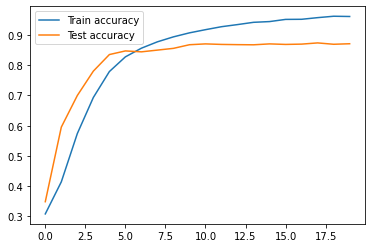

In [86]:
###### plot the accuracy and val_accuracy ######
plt.plot(history_.history['accuracy'], label = 'Train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'Test accuracy')
plt.legend()
plt.show()

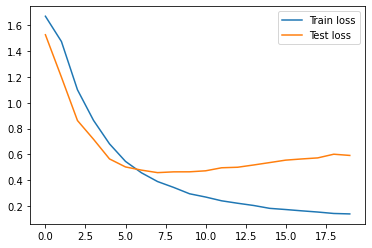

In [87]:
###### plot the loss and val_loss ######
plt.plot(history_.history['loss'], label = 'Train loss')
plt.plot(history_.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()

Using LSTM RNN to Predict the Model.

In [129]:
###### Split the dataset into X and y ######
X = df.loc[:, 'message']
y = df.loc[:, 'target']

In [263]:
df.head()

,message,target
0,didnt feel humiliate,5
1,go feel hopeless damn hopeful around someone c...,5
2,im grab minute post feel greedy wrong,0
3,ever feel nostalgic fireplace know still property,4
4,feel grouchy,0


In [265]:
###### Find the unique vocabulary size from this dataset ######
tokenizer_ = Tokenizer()
tokenizer_.fit_on_texts(df.loc[:, 'message'])
voc_size = len(tokenizer_.word_index)
voc_size = voc_size + 1

print("Vocabulary size in this dataset is = ", voc_size,'\n')

Vocabulary size in this dataset is =  13657 



In [266]:
###### One Hot Representation ######
one_hot_ = [one_hot(record_, voc_size) for record_ in df.loc[:, 'message']]
print(one_hot_)

[[10731, 3422, 6283], [10040, 3422, 5858, 4094, 4570, 6464, 2203, 13357, 7980], [3137, 2527, 8259, 2681, 3422, 6598, 8423], [5550, 3422, 5226, 1997, 5461, 13218, 9758], [3422, 8035], [8883, 3422, 11703, 5380, 10590, 3666, 1420], [8883, 5180, 7509, 1783, 9364, 3506, 8883, 5732, 6653, 12180, 5015, 13222, 3422, 10530, 6253], [3422, 9633, 7333, 8709, 12369, 9304, 1550, 10571], [5745, 6314, 3422, 5745, 1740, 2263, 4454, 5634, 3259], [3422, 6604], [3422, 10530, 4454, 13634, 10221, 3526, 5328], [3422, 1076, 9466, 6288, 392, 1278, 345, 7476], [3806, 2480, 1783, 9304, 3422, 5093], [3422, 1217, 8669, 6076], [10703, 2460, 6618, 10131, 8521, 9111, 10536, 9858, 9379, 1783, 5062, 638, 7333, 13477, 497, 9608, 4609, 9072, 416, 3422, 11703, 6729], [3422, 3760, 2207, 6463], [10731, 12929, 3422, 7440], [3422, 10569, 11845, 1783], [11254, 3422, 10560, 13546, 8518, 6242, 4171, 7630, 5534, 13546, 5634], [3422, 7778, 1199, 6273, 5619, 10117, 1090, 9275], [3422, 1535, 9555, 8894, 3081, 8329, 6975, 8329], [342

In [267]:
###### Find the max length of the list ######
max_length_ = -1

for list_ in one_hot_:
  if len(list_) > max_length_:
    max_length_ = len(list_)
  else:
    pass

print("Max Length is = ", max_length_)

Max Length is =  35


In [268]:
###### Do the pre padding in here ######
embedded_doc_ = pad_sequences(one_hot_, padding = 'pre', maxlen = max_length_ + 2)
print(embedded_doc_)

[[    0     0     0 ... 10731  3422  6283]
 [    0     0     0 ...  2203 13357  7980]
 [    0     0     0 ...  3422  6598  8423]
 ...
 [    0     0     0 ...  8542  6288 10507]
 [    0     0     0 ...  5584 11126 11326]
 [    0     0     0 ... 11445  8079  1366]]


In [269]:
embedded_doc_[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0, 10731,  3422,
        6283], dtype=int32)

In [270]:
###### Split the dataset into train and test #######
X_train, X_test, y_train, y_test = train_test_split(embedded_doc_, y, test_size = 20, random_state = 42)

print("X_train shape is = ", X_train.shape)
print("y_train shape is = ", y_train.shape)
print("X_test  shape is = ", X_test.shape)
print("y_test  shape is = ", y_test.shape)

X_train shape is =  (19979, 37)
y_train shape is =  (19979,)
X_test  shape is =  (20, 37)
y_test  shape is =  (20,)


In [344]:
###### Embedding Layer and LSTM ######
model = Sequential()

###### Create an embeddig layer ######
model.add(Embedding(input_dim = voc_size, output_dim = 300, input_length = max_length_ + 2))
###### Use the Dropout Layer ######
model.add(Dropout(0.5))


###### Create an LSTM with 100 neurons #####
model.add(LSTM(units = 100))
###### Use the dropout function ######
model.add(Dropout(0.5))


###### Create an output layer ######
model.add(Dense(units = 6, activation = 'softmax'))


###### Compile the model ######
model.compile(optimizer = 'Adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

###### fit the model and run ######
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 32, verbose = 1)

Epoch 1/20
625/625 [==============================] - 6s 6ms/step - loss: 0.9027 - accuracy: 0.6693 - val_loss: 0.1894 - val_accuracy: 0.9500
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 0.2444 - accuracy: 0.9159 - val_loss: 0.0637 - val_accuracy: 1.0000
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 0.1565 - accuracy: 0.9420 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 4/20
625/625 [==============================] - 3s 5ms/step - loss: 0.1197 - accuracy: 0.9553 - val_loss: 0.0487 - val_accuracy: 1.0000
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0970 - accuracy: 0.9660 - val_loss: 0.0798 - val_accuracy: 0.9500
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0840 - accuracy: 0.9687 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 0.0699 - accuracy: 0.9719 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 

In [272]:
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis = 1)

###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(y_pred_bool, y_test))
print("recall is     = ", recall_score(y_pred_bool, y_test, average = 'macro'))
print("precision is  = ", precision_score(y_pred_bool, y_test, average = 'macro'))
print("f1 score is   = ", f1_score(y_pred_bool, y_test, average = 'macro'))

accuracy is   =  1.0
recall is     =  1.0
precision is  =  1.0
f1 score is   =  1.0


In [177]:
model.predict(X_test)

array([[9.79783152e-08, 9.78502612e-07, 9.99961495e-01, 3.54340482e-05,
        9.43875762e-07, 1.03415744e-06],
       [9.99996662e-01, 2.02175698e-07, 1.06198463e-07, 3.51537786e-08,
        2.43826844e-06, 5.95236997e-07],
       [2.35769359e-04, 9.89023685e-01, 8.85661412e-03, 3.35556018e-04,
        1.45268394e-03, 9.57624143e-05],
       [4.06147535e-07, 9.99996781e-01, 2.08307119e-06, 3.98655260e-07,
        2.83471024e-07, 4.13493702e-08],
       [2.32303751e-06, 9.99987960e-01, 2.46991931e-06, 4.37831386e-06,
        2.84016892e-06, 1.88312441e-07],
       [1.47747983e-06, 9.99979973e-01, 4.64796767e-06, 1.15384419e-05,
        2.01290527e-06, 3.74647129e-07],
       [1.14896595e-01, 1.86497688e-01, 5.96379280e-01, 7.54825100e-02,
        1.48806805e-02, 1.18632233e-02],
       [2.68688723e-06, 1.50285530e-06, 1.14932636e-05, 9.99964952e-01,
        1.87066632e-07, 1.92461248e-05],
       [9.99993086e-01, 1.50786136e-07, 6.50549566e-07, 1.39442122e-07,
        4.39525911e-06, 

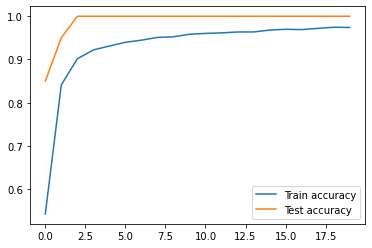

In [139]:
###### plot the accuracy and val_accuracy ######
plt.plot(history_.history['accuracy'], label = 'Train accuracy')
plt.plot(history_.history['val_accuracy'], label = 'Test accuracy')
plt.legend()
plt.show()

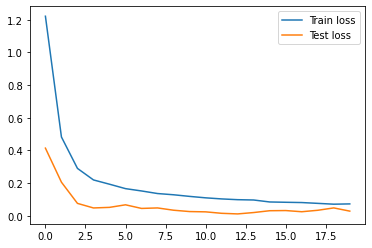

In [140]:
###### plot the loss and val_loss ######
plt.plot(history_.history['loss'], label = 'Train loss')
plt.plot(history_.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()

In [149]:
df.target.value_counts()

0    6760
1    5797
2    2709
3    2373
4    1641
5     719
Name: target, dtype: int64

In [346]:
def sentence_cleaning(sentence):
    """Pre-processing sentence for prediction"""
    stemmer = PorterStemmer()
    corpus = []
    # text = re.sub("[^a-zA-Z]", " ", sentence)
    text = sentence
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords.words('english')]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=voc_size) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word,maxlen=max_length_ + 2, padding='pre')
    return pad

In [356]:
sentences = ["I'd like to take you on a date some time."]
for sentence in sentences:
    print(sentence)
    sentence = sentence_cleaning(sentence)
    result = lb.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  (model.predict(sentence))
    print(f"{result} : {proba}\n\n")

I'd like to take you on a date some time.
joy : [[0.10263595 0.00849381 0.79202884 0.01053279 0.07566015 0.01064838]]




In [348]:
from nltk.tokenize import word_tokenize
emotions = {'joy': 0, 'sadness': 1, 'anger': 2, 'fear': 3, 'love': 4, 'surprise': 5}

def get_key(value):
    for key,val in emotions.items():
          if (val==value):
            return key

def remove_stopwords(sentence):
    text_tokens = word_tokenize(sentence)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
    return (" ").join(tokens_without_sw)
        
def predict(sentence):
    sentence = remove_stopwords(sentence.lower())
    print(sentence)
    sentence_lst=[]
    sentence_lst.append(sentence)
    sentence_seq=tokenizer_.texts_to_sequences(sentence_lst)
    sentence_padded=pad_sequences(sentence_seq,maxlen=max_length_ + 2,padding='pre')
    certaintyprediction = model.predict(sentence_padded)[0]
    for key,val in emotions.items():
          print(key + ': ' + str(round(certaintyprediction[val]*100, 2)) + ' %')
    bestpredictionindex = np.argmax(certaintyprediction)
    certainty = str(round(certaintyprediction[bestpredictionindex]*100, 2))
    print('\nI am '+ certainty + ' % sure the emotion is ' + get_key(bestpredictionindex) + '.')

In [353]:
predict("I hate you")

hate
joy: 3.92 %
sadness: 3.42 %
anger: 70.86 %
fear: 19.07 %
love: 1.59 %
surprise: 1.15 %

I am 70.86 % sure the emotion is anger.


In [334]:
y.value_counts()

0    6760
1    5797
2    2709
3    2373
4    1641
5     719
Name: target, dtype: int64